Lấy dữ liệu bằng api.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Thu thập dữ liệu** 

In [2]:
INDICATOR_CODES = ['SP.POP.TOTL', # Tổng dân số
                   'SP.POP.TOTL.FE.IN', # Dân số nữ
                   'SP.POP.TOTL.MA.IN', # Dân số nam
                   'SP.DYN.CBRT.IN', # Tỉ lệ sinh(Trên 1000 dân)
                   'SP.DYN.CDRT.IN', # Tỉ lệ tử(Trên 1000 dân)
                   'NY.GDP.MKTP.CD', # GDP(USD)
                   'SL.UEM.TOTL.ZS', # Tỉ lệ thất nghiệp(%)
                   'SP.URB.TOTL.IN.ZS', # Tỉ lệ dân số đô thị(%)
                   'NE.EXP.GNFS.ZS', # Xuất khẩu hàng hóa và dịch vụ(%GPD)
                   'NE.IMP.GNFS.ZS', # Nhập khẩu hàng hóa và dịch vụ(%GPD)
                   'NY.GDP.MKTP.KD.ZG', #Tốc độ tăng trưởng GPD(%)
                   'SP.URB.GROW', # Tốc độ tăng trưởng dân số đô thị hằng năm(%)
                   'SP.DYN.TFRT.IN', # Tổng tỉ suất sinh(Số con trung bình của 1 phụ nữ)
                   'SL.AGR.EMPL.ZS', # Tỉ lệ lao động ở ngành nông nghiệp(%)
                   'SL.IND.EMPL.ZS', # Tỉ lệ lao động ở ngành công nghiệp(%)
                   'SL.SRV.EMPL.ZS',  # Tỉ lệ lao động ở ngành dịch vụ(%)
                   'NV.AGR.TOTL.ZS', # Tỉ trọng ngành nông nghiệp(%GDP)
                   'NV.IND.TOTL.ZS', # Tỉ trọng ngành công nghiệp(%GDP)
                   'NV.SRV.TOTL.ZS', # Tỉ trọng ngành dịch vụ(%GDP)
                   ]

In [3]:
COUNTRY_CODES = ['AUS', 'AFG', 'BGD', 'BTN', 'BRA', 'CHL', 'CAN', 'CHN', 'CUB', 'DEU', 'DNK', 'EGY', 'ETH', 'GBR',
                  'IDN', 'IND', 'JPN', 'KHM', 'LBY', 'MMR', 'MEX', 'SGP', 'PHL', 'RUS', 'THA', 'USA', 'VNM', 'ZWE']

In [4]:
def loadData(country_code, start, end, format = "json", per_page = 100):

    records = {}
    for indicator_code in INDICATOR_CODES:
        url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_code}?date={start}:{end}&format=json&per_page={per_page}"
        response = requests.get(url)

        if response.status_code == 200:

            data = response.json()
            
            count = data[0]['total']

            
            for i in range(count):
                item = data[1][i]
                feature = item['indicator']['value']
                country = item['country']['value']
                year = item['date']
                value = item['value']

                if year not in records:
                    records[year] = {"Year": year}
                
                records[year]['Country'] = country

                records[year][feature] = value
            

        df = pd.DataFrame(records.values())

    return df
        
    

In [5]:
raw_data = pd.DataFrame()
for country in COUNTRY_CODES:
    print(country)

    df = loadData(country, 1980, 2020)
    raw_data = pd.concat([raw_data, df], ignore_index=True)

AUS
AFG
BGD
BTN
BRA
CHL
CAN
CHN
CUB
DEU
DNK
EGY
ETH
GBR
IDN
IND
JPN
KHM
LBY
MMR


C:\Users\ndh01\AppData\Local\Temp\ipykernel_17088\813692037.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  raw_data = pd.concat([raw_data, df], ignore_index=True)


MEX
SGP
PHL
RUS
THA
USA
VNM
ZWE


In [6]:
raw_data.head()
raw_data.to_csv('Data.csv', index=False)

# **Tiền xử lý dữ liệu**

In [7]:
import pandas as pd

In [8]:
raw_data = pd.read_csv('Data.csv')

In [9]:
# check the number of columns having null values
null_counts = raw_data.isnull().sum()
num_columns_with_null = (null_counts > 0).sum()
print(f"The number of column having null values: {num_columns_with_null}")

The number of column having null values: 11


In [10]:
developed_countries = ['Australia', 'Canada', 'Germany', 'Denmark', 'United Kingdom', 'Japan', 'Singapore', 'United States']
undeveloped_countries = ["Cambodia", "Myanmar", "Zimbabwe"]
# Đánh chỉ số 0 cho các nước phát triển, 1 cho các nước đang phát triển, 2 cho các nước chưa phát triển
raw_data['Development_Status'] = raw_data['Country'].apply(lambda x: 'Developed' if x in developed_countries else ('Least developed' if x in undeveloped_countries else 'Developing'))


In [11]:
# normalize the null values by the average value of each column following the Development_Status
numeric_columns = raw_data.select_dtypes(include=['number']).columns
raw_data[numeric_columns] = raw_data.groupby("Development_Status")[numeric_columns].transform(lambda x: x.fillna(x.mean()))
preprocessed_data = raw_data
preprocessed_data.to_csv("processed_data.csv", index=False)


## **Đặt câu hỏi**

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('processed_data.csv')
data.head(5)

,Year,Country,"Population, total","Population, female","Population, male","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",GDP (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),...,GDP growth (annual %),Urban population growth (annual %),"Fertility rate, total (births per woman)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",Development_Status
0,2020,Australia,25649248,12922405,12726843,11.5,6.3,1.328414e+12,6.456,86.241,...,-0.119591,1.369185,1.581,2.765998,19.191097,78.042912,2.012249,25.386456,66.250518,Developed
1,2019,Australia,25334826,12762303,12572523,12.1,6.7,1.392724e+12,5.159,86.124,...,2.171545,1.607625,1.657,2.558293,19.058460,78.383247,2.115781,25.272079,66.012913,Developed
2,2018,Australia,24963258,12575335,12387923,12.6,6.3,1.427809e+12,5.300,86.012,...,2.878470,1.621636,1.740,2.616852,19.887638,77.495518,2.460038,24.124058,66.562652,Developed
3,2017,Australia,24592588,12390298,12202290,12.6,6.5,1.325583e+12,5.592,85.904,...,2.279592,1.767968,1.741,2.596054,19.430111,77.973844,2.706447,23.474061,66.892763,Developed
4,2016,Australia,24190907,12185876,12005031,12.9,6.6,1.206837e+12,5.711,85.800,...,2.759386,1.677390,1.752,2.621225,19.695735,77.683040,2.405553,22.319976,68.127659,Developed


In [14]:
group_data = data.groupby(['Development_Status', 'Year']).mean(numeric_only=True).reset_index()
group_data

,Development_Status,Year,"Population, total","Population, female","Population, male","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",GDP (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),...,Imports of goods and services (% of GDP),GDP growth (annual %),Urban population growth (annual %),"Fertility rate, total (births per woman)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)"
0,Developed,1980,6.567243e+07,3.364070e+07,3.203173e+07,14.187500,8.637500,7.516095e+11,5.993121,80.772000,...,44.421308,2.064134,0.868417,1.741313,2.520308,24.378595,73.101098,1.755782,26.199963,64.317048
1,Developed,1981,6.615829e+07,3.387503e+07,3.228326e+07,13.975000,8.600000,7.945263e+11,5.993121,80.883375,...,43.645102,2.921224,1.325965,1.707125,2.520308,24.378595,73.101098,1.783275,26.019725,64.474461
2,Developed,1982,6.660706e+07,3.409079e+07,3.251627e+07,13.900000,8.575000,7.977311e+11,5.993121,80.955000,...,41.233728,1.778784,1.189127,1.697062,2.520308,24.378595,73.101098,1.808177,25.888808,64.650525
3,Developed,1983,6.701443e+07,3.428028e+07,3.273415e+07,13.587500,8.625000,8.456591e+11,5.993121,81.011125,...,38.260143,3.194431,0.694570,1.661625,2.520308,24.378595,73.101098,1.709347,26.039923,64.522202
4,Developed,1984,6.740238e+07,3.445942e+07,3.294296e+07,13.500000,8.525000,9.001943e+11,5.993121,81.047375,...,38.084433,5.045416,0.709737,1.648313,2.520308,24.378595,73.101098,1.773265,26.180501,64.300996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Least developed,2016,2.731626e+07,1.386598e+07,1.345029e+07,24.455000,7.657667,3.680120e+10,2.553333,28.320000,...,47.346654,4.889643,1.957327,2.844000,51.619059,16.828672,31.552276,17.470197,29.993591,47.245135
119,Least developed,2017,2.759360e+07,1.400687e+07,1.358673e+07,23.997667,7.616333,4.882779e+10,2.613667,28.513000,...,39.934583,6.097137,1.985281,2.804333,51.426519,16.822259,31.751219,16.173349,34.371543,45.385699
120,Least developed,2018,2.786041e+07,1.414268e+07,1.371773e+07,23.582667,7.489333,4.505416e+10,2.563333,28.725333,...,45.281435,6.684984,1.990836,2.769000,50.447608,17.405361,32.147030,15.297643,34.957594,45.721984
121,Least developed,2019,2.813113e+07,1.428042e+07,1.385071e+07,23.153667,7.560667,4.582262e+10,2.633000,28.955667,...,44.341122,2.727871,2.062570,2.733667,50.674225,17.436557,31.889224,15.366642,36.494718,44.186752


In [15]:
group_data.columns

Index(['Development_Status', 'Year', 'Population, total', 'Population, female',
       'Population, male', 'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)', 'GDP (current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Urban population (% of total population)',
       'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)', 'GDP growth (annual %)',
       'Urban population growth (annual %)',
       'Fertility rate, total (births per woman)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Industry (including construction), value added (% of GDP)',
       'Services, value added (% of GDP)'],
      dty

### Câu 1: Phân tích tình hình tăng trưởng GPD, tỉ lệ xuất nhập khẩu hàng hóa và dịch vụ ở các nhóm nước

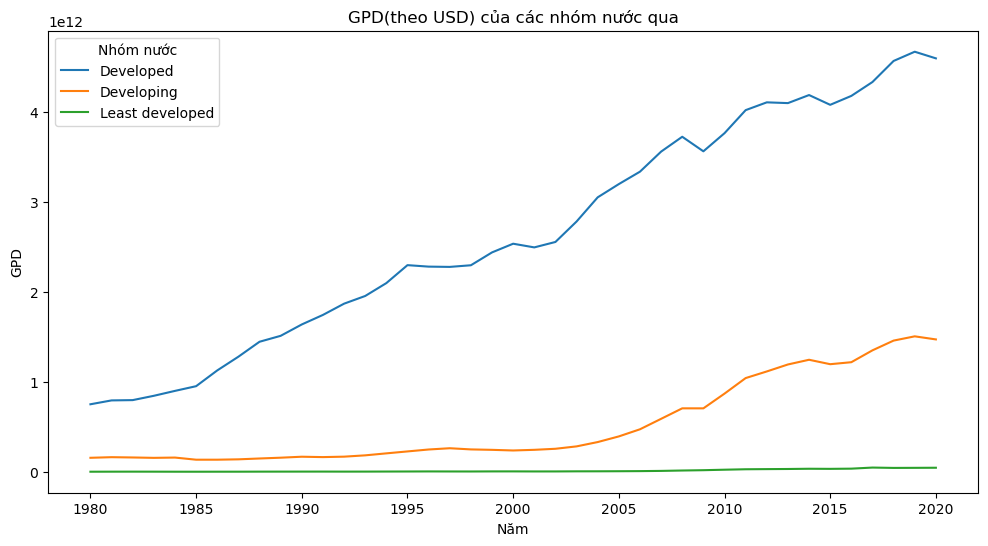

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='GDP (current US$)', hue='Development_Status')

plt.title('GPD(theo USD) của các nhóm nước qua')
plt.xlabel('Năm')
plt.ylabel('GPD')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- GPD của các nước phát triển và đang phát triển có sự tăng đáng kể.
- Nhóm nước đang phát triển bắt đầu tăng mạnh từ những năm 2000.
- Nhóm nước chưa phát triển có GPD không thay đổi nhiều

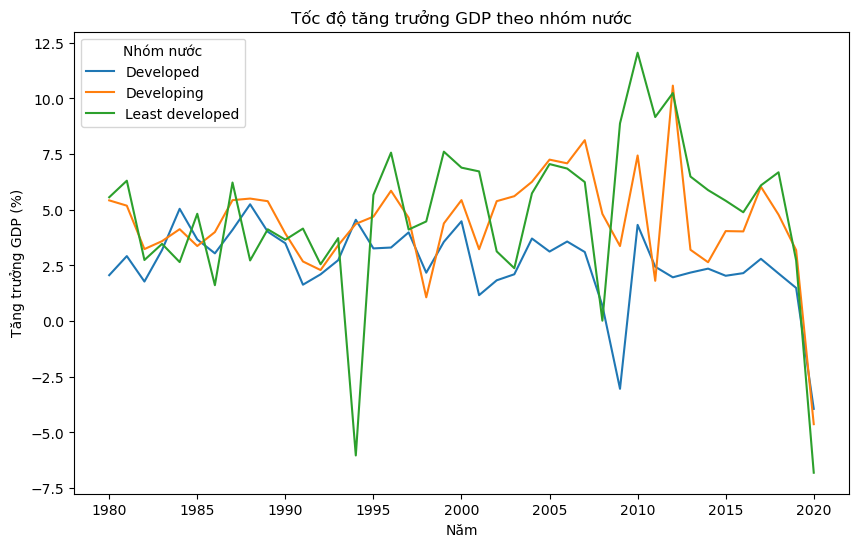

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=group_data, x='Year', y='GDP growth (annual %)', hue='Development_Status', markers="o")

plt.title('Tốc độ tăng trưởng GDP theo nhóm nước')
plt.xlabel('Năm')
plt.ylabel('Tăng trưởng GDP (%)')
plt.legend(title="Nhóm nước")
plt.show()


**Phân tích:**
- Nhìn chung, tỉ lệ tăng trưởng GPD của nhóm nước phát triển và đang phát triển phần lớn đều dương.
- Đa phần là nhóm nước đang phát triển có tỉ lệ tăng trưởng cao hơn nhóm nước phát triển
- Tỉ lệ tăng trưởng của nhóm nước kém phát triển có sự biến động mạnh

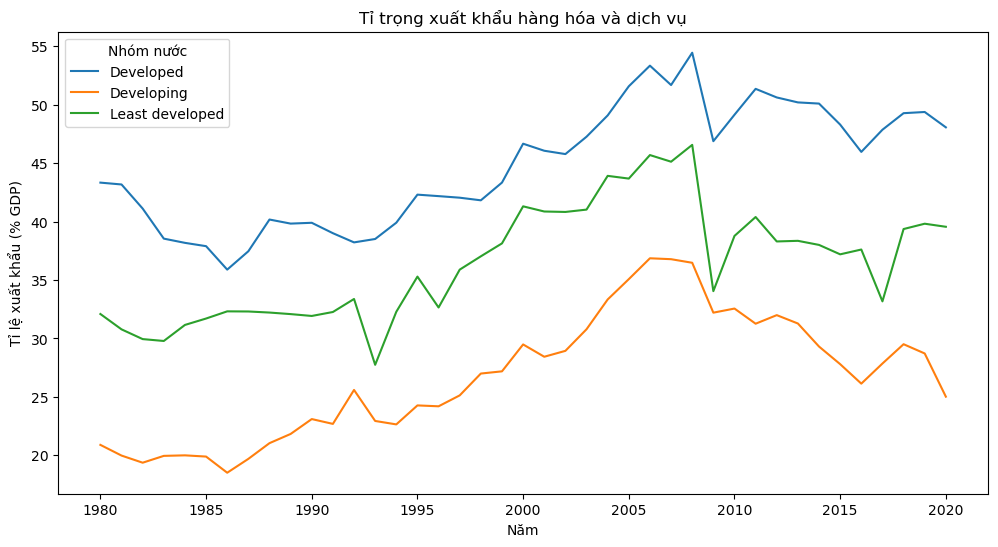

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Exports of goods and services (% of GDP)', hue='Development_Status')

plt.title('Tỉ trọng xuất khẩu hàng hóa và dịch vụ')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ xuất khẩu (% GDP)')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Tỉ trọng xuất khẩu của các nước đều có xu hướng tăng theo thời gian.
- Nhóm nước đang phát triển lại có tỉ trọng xuất khẩu thấp nhất.

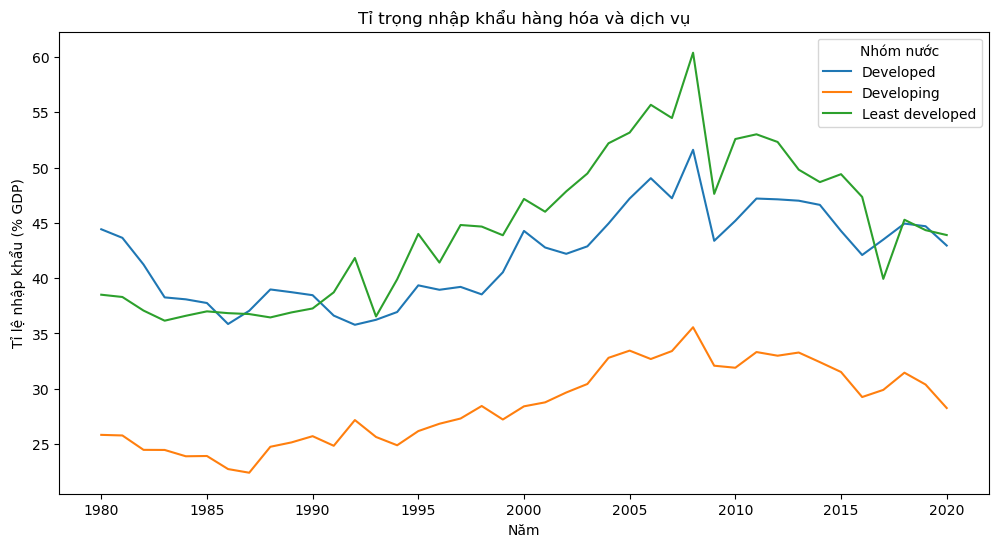

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Imports of goods and services (% of GDP)', hue='Development_Status')

plt.title('Tỉ trọng nhập khẩu hàng hóa và dịch vụ')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ nhập khẩu (% GDP)')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Tỉ trọng nhập khẩu xu hướng tăng theo thời gian.
- Nhóm nước đang phát triển có tỉ trọng nhập khẩu thấp nhất

**Kết luận:**
- Nhóm nước phát triển và đang phát triển có tỉ lệ tăng trưởng gpd cao, tăng trong nhiều năm liền. Điều này cho thấy tình hình kinh tế đang tăng trưởng ổn định, có định hướng kinh tế lâu dài.
- Nhóm nước chậm phát triển tuy vẫn có tăng, nhưng những biến động mạnh cho thấy các nước này có nên kinh tế bất ổn, có tiềm ẩn có nguy cơ suy thoái mạnh.
- Điều khác lạ là nhóm nước chậm phát triển lại có tỉ trọng xuất khẩu khá cao, đi cùng với tỉ trọng nhập khẩu cao. Điều này có thể là do các nước chậm phát triển có chi phí nhân công rẻ, nên được các công ty, tập đoàn chọn làm nơi đặt nhà máy, do đó tỉ lệ nhập khẩu nguyên vật liệu và xuất khẩu hàng hóa cao. Cùng với việc GPD của các nước này còn thấp nên tạo thành việc tỉ trọng cao như trên.
- Trái lại, các nước đang phát triển có tỉ lệ xuất nhập khẩu khá thấp do GPD đã cao, cùng với nhu cầu trong nước, nội địa hóa các dây chuyền sản xuất.

### Câu 2: Tình hình dân số của các nhóm nước

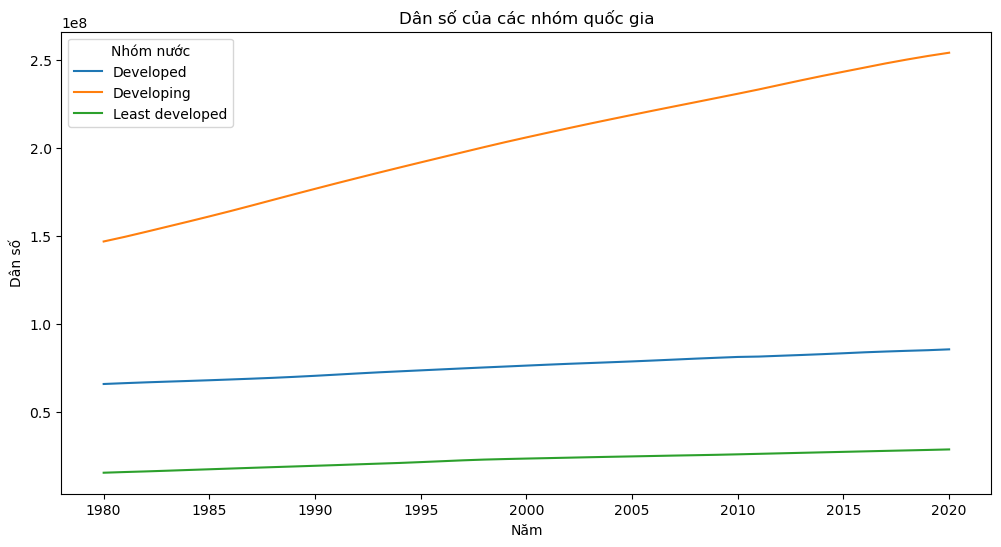

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Population, total', hue='Development_Status')

plt.title('Dân số của các nhóm quốc gia')
plt.xlabel('Năm')
plt.ylabel('Dân số')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Nhóm nước đang phát triển có dân số đông hơn nhiều so với 2 nhóm còn lại.
- Tốc độ tăng trưởng của nhóm nước đang phát triển cũng cao hơn.

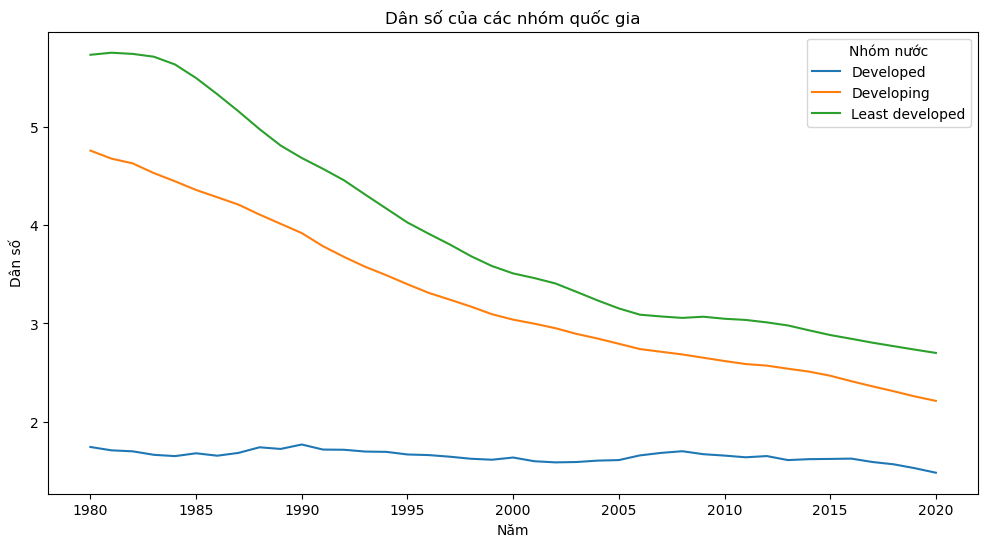

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Fertility rate, total (births per woman)', hue='Development_Status')

plt.title('Dân số của các nhóm quốc gia')
plt.xlabel('Năm')
plt.ylabel('Dân số')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Tỉ lệ sinh của các nhóm nước đều giảm
- Tỉ lệ sinh của nhóm nước chưa phát triển cao nhất
- Các nước phát triển có tỉ lệ sinh phá thấp, và xu hướng vẫn đang giảm

**Kết luận:**
- Tỉ lệ sinh của nhóm nước chưa phát triển và đang phát triển đều cao. Tuy nhiên, xu hướng đều đang giảm, điều này là do các nước đều có những chính sách để không bị bùng nổ dân số quá nhanh, gây áp lực lên các vấn đề xã hội.
- Nhóm nước phát triển có tỉ lệ sinh thấp, dân số thấp.
- Tuy nhóm nước chưa phát triển có tỉ lệ sinh cao nhất, nhưng tăng trưởng dân số lại khá thấp(độ dốc thấp hơn nhóm nước đang phát triển). Điều này là do các nước chưa phát triển có điều kiện y tế, xã hội chưa tốt nên tuổi thọ bình quân đầu người không cao.

### Câu 3: Tỉ trọng các ngành nông nghiệp, công nghiệp, dịch vụ ở các nhóm nước

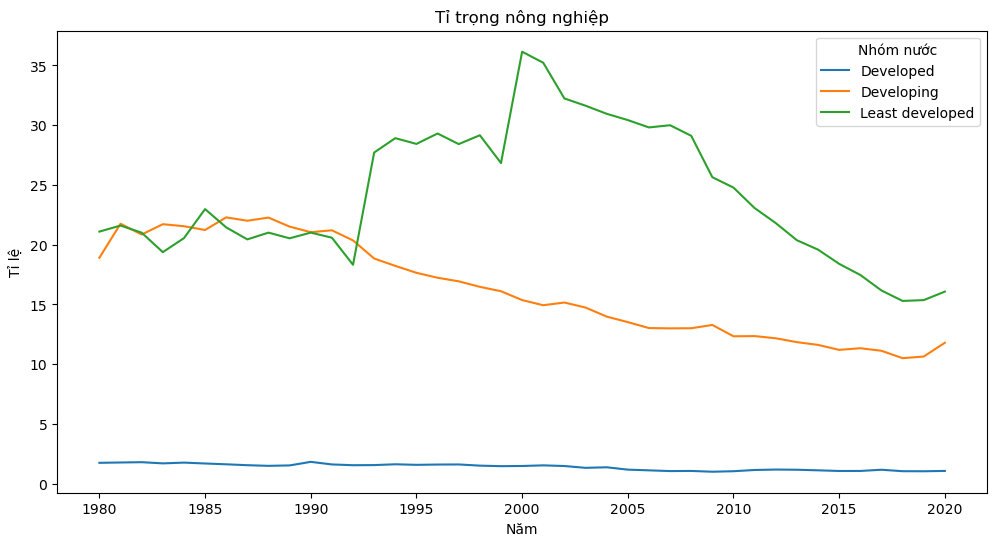

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Agriculture, forestry, and fishing, value added (% of GDP)', hue='Development_Status')
plt.title('Tỉ trọng nông nghiệp')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Các nhóm nước chưa phát triển tăng tỉ trọng nông nghiệp vào đầu những năm 2000, sau đó cũng có xu hướng giảm tỉ trọng
- Nhóm nước đang phát triển có xu hướng giảm tỉ trọng nông nghiệp trong nền kinh tế.
- Các nhóm nước phát triển giảm rất ít
- Tỉ trọng ngành nông nghiệp ở nhóm nước phát triển rất thấp(dưới 10%)

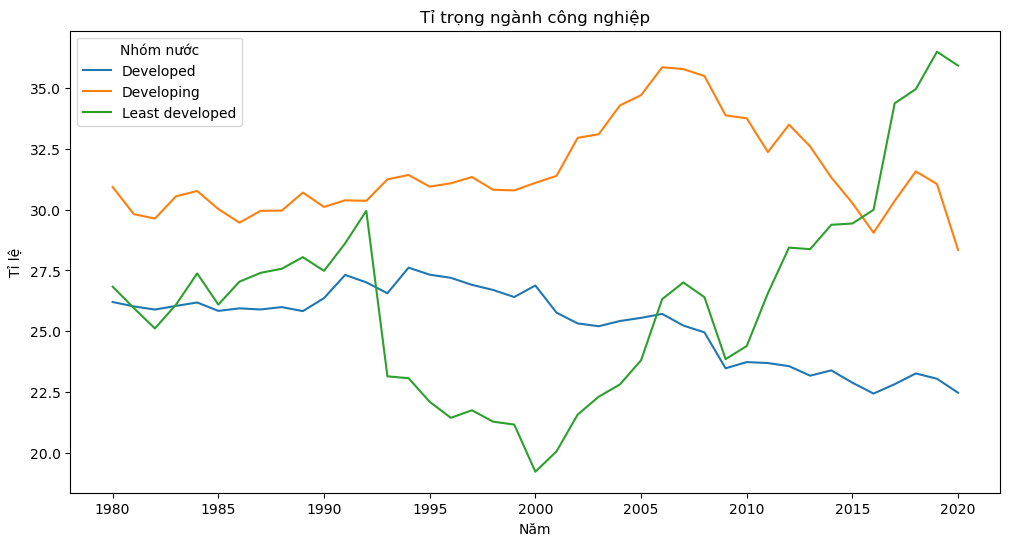

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y='Industry (including construction), value added (% of GDP)', hue='Development_Status')
plt.title('Tỉ trọng ngành công nghiệp')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Nhóm nước chưa phát triển có xu hướng tăng tỉ trọng ngành công nghiệp.
- Nhóm nước đang phát triển có xu hướng tăng tỉ trọng ngành công nghiệp ở khoảng những năm 2000. Nhưng khi sau đó, lại bắt đầu giảm tỉ trọng.
- Nhóm nước đã phát triển lại có tình trạng giảm tỉ trọng.

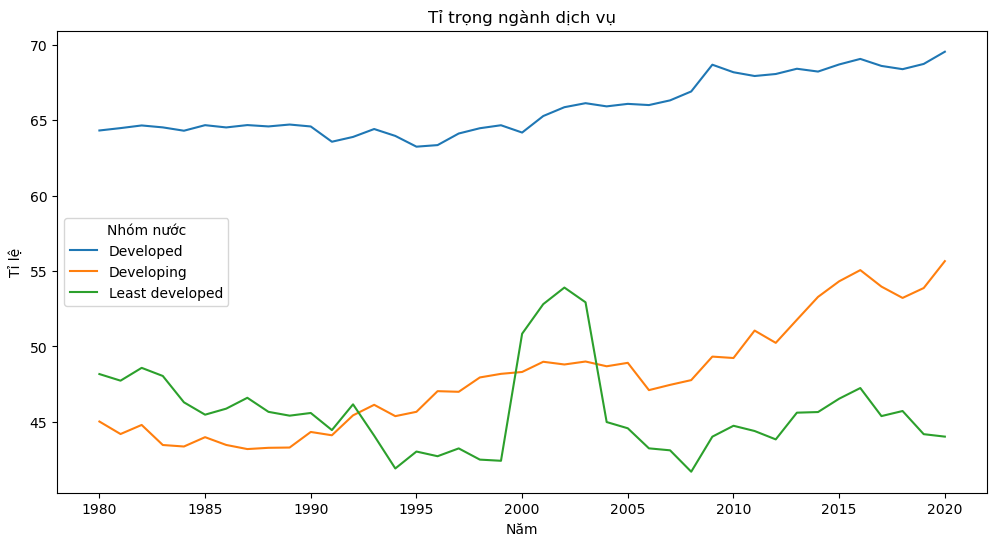

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=group_data, x='Year', y= 'Services, value added (% of GDP)', hue='Development_Status')
plt.title('Tỉ trọng ngành dịch vụ')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ')
plt.legend(title='Nhóm nước')
plt.show()

**Phân tích:**
- Nhóm nước chưa phats triển có tỉ trọng ngành dịch vụ biến động mạnh, ở những năm gần đây khá thấp.
- Tỉ trọng ngành dịch vụ ở nhóm nước đã phát triển rất cao(trên 60%)

**Kết luận:**
- Nhìn chung các nước đều đang tăng tỉ trọng ngành dịch vụ, giảm tỉ trọng nông nghiệp.
- Các nước đã phát triển có tỉ trọng nông nghiệp rất thấp, và họ không giảm nữa(vì đảm bảo an ninh lương thực). Nhưng họ lại giảm tỉ trọng ngành công nghiệp, ở đây sẽ là các ngành công nghiệp sản xuất, đòi hỏi kĩ thuật thấp. Nền kinh tế của họ tập trung vào khối ngành dịch vụ và công nghiệp chất lượng cao, dựa trên nền tảng công nghệ kĩ thuật vượt trội.
- Các nhóm nước chưa phát triển và đang phát triển cũng đang có xu hướng giảm tỉ trọng ngành nông nghiệp, vì nền kinh tế của họ đang chuyển dần theo hướng công nghiệp hóa-hiện đại hóa. Ngành dịch vụ cũng được quan tâm, phát triển nhưng chưa chiếm tỉ trọng cao trong nền kinh tế như nhóm nước đã phát triển

## **Kỳ**



1. Tỷ lệ đô thị hóa có liên quan gì đến tỷ lệ thất nghiệp:
Các đặc trưng:
- Unemployment, total (% of total labor force) (modeled ILO estimate)
- GDP growth (annual %)
Chọn loại biểu đồ:
- Biểu đồ đường để so sánh tuổi thọ với tỷ lệ sinh và tỷ lệ tử theo thời gian.
- Biểu đồ phân tán (Scatter Plot) để kiểm tra mối quan hệ giữa tỷ lệ sinh, tỷ lệ tử và tuổi thọ.
2. Cơ cấu lao động theo ngành thay đổi như thế nào và có liên quan gì đến tỷ lệ thất nghiệp?
Các đặc trưng:
- Employment in industry.
- Employment in agriculture.
- Employment in services.
- Unemployment, total (% of total labor force) (Tỷ lệ thất nghiệp)
Chọn loại biểu đồ:
- Biểu đồ cột nhóm (Grouped Bar Chart) để so sánh tỷ lệ lao động trong công nghiệp, nông nghiệp và tỷ lệ thất nghiệp theo năm.
- Biểu đồ đường để xem xu hướng biến động tỷ lệ thất nghiệp theo thời gian.
3. Tác động của thất nghiệp đến nền kinh tế.
Các đặc trưng:
- Unemployment, total.
- GDP growth (annual %)
Chọn loại biểu đồ:
- Biểu đồ phân tán (Scatter Plot) xác định mối quan hệ giữa tỷ lệ thất nghiệp và tăng trưởng GDP.
- Biểu đồ đường (Line Chart) theo dõi xu hướng thất nghiệp và tăng trưởng GDP theo thời gian.

Kỳ - Câu 1:

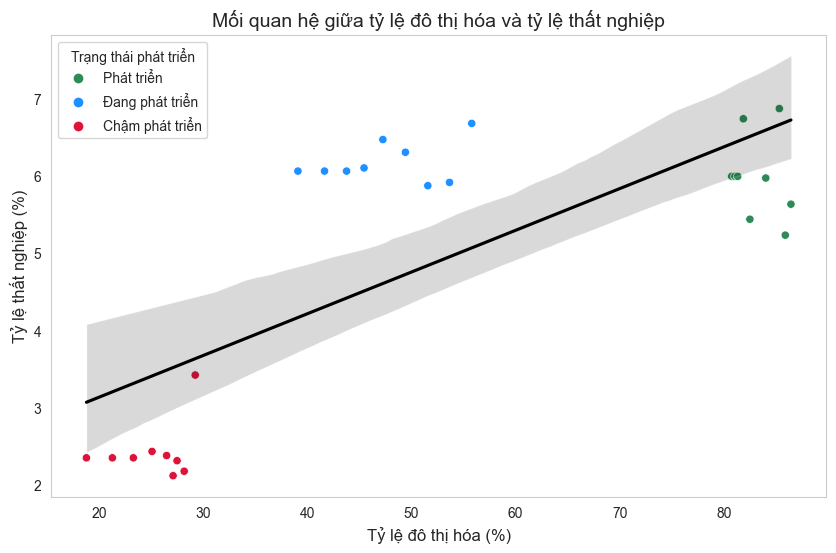

In [31]:

group_df_filtered = group_df[group_df['Year'] % 5 == 0]
# Định nghĩa bảng màu rõ ràng hơn
palette = {
    0: '#2E8B57',  # Xanh lá đậm - Phát triển
    1: '#1E90FF',  # Xanh dương - Đang phát triển
    2: '#DC143C'   # Đỏ - Chậm phát triển
}

plt.figure(figsize=(10, 6))

# Vẽ biểu đồ phân tán
sns.scatterplot(
    data=group_df_filtered, 
    x='Urban population (% of total population)',  # Tỷ lệ đô thị hóa
    y='Unemployment, total (% of total labor force) (modeled ILO estimate)',  # Tỷ lệ thất nghiệp
    hue='Development_Status',  # Phân loại theo trạng thái phát triển
    palette=palette  # Áp dụng bảng màu mới
)

# Thêm đường hồi quy để xem xu hướng chung
sns.regplot(
    data=group_df_filtered, 
    x='Urban population (% of total population)', 
    y='Unemployment, total (% of total labor force) (modeled ILO estimate)', 
    scatter=False,  # Không hiển thị các điểm dữ liệu
    color='black'  # Màu của đường hồi quy
)

# Định dạng biểu đồ
plt.title('Mối quan hệ giữa tỷ lệ đô thị hóa và tỷ lệ thất nghiệp', fontsize=14)
plt.xlabel('Tỷ lệ đô thị hóa (%)', fontsize=12)
plt.ylabel('Tỷ lệ thất nghiệp (%)', fontsize=12)

# Cập nhật chú thích để khớp với bảng màu
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Phát triển', 'Đang phát triển', 'Chậm phát triển'], title='Trạng thái phát triển')

plt.grid()
plt.show()

Kỳ - Câu 2:

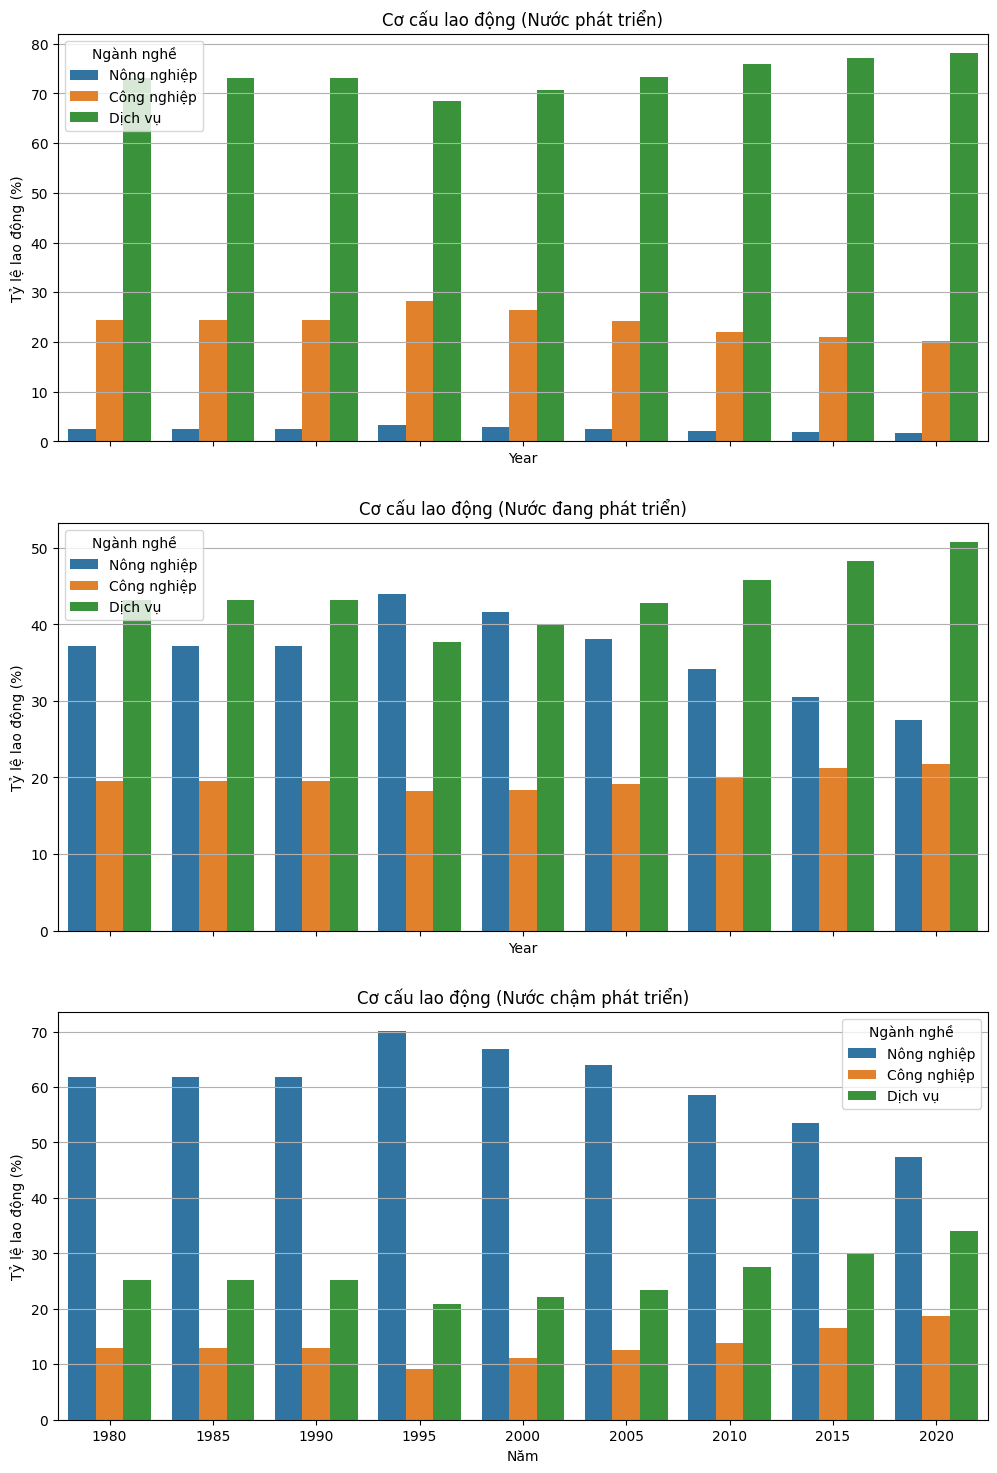

In [ ]:


development_groups = {
    0 : 'Nước phát triển',
    1 : 'Nước đang phát triển',
    2 : 'Nước chậm phát triển'
}

# Tạo figure với 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Lặp qua từng nhóm phát triển để vẽ biểu đồ
for i, (status, title) in enumerate(development_groups.items()):
    subset = group_df_filtered[group_df_filtered['Development_Status'] == status]

    # Chuyển đổi dữ liệu sang dạng phù hợp cho biểu đồ cột nhóm
    subset_melted = subset.melt(id_vars=['Year'], 
                                value_vars=['Employment in agriculture (% of total employment) (modeled ILO estimate)',
                                            'Employment in industry (% of total employment) (modeled ILO estimate)',
                                            'Employment in services (% of total employment) (modeled ILO estimate)'],
                                var_name='Ngành nghề', 
                                value_name='Tỷ lệ lao động')

    # Đổi tên ngành nghề để dễ đọc
    subset_melted['Ngành nghề'] = subset_melted['Ngành nghề'].replace({
        'Employment in agriculture (% of total employment) (modeled ILO estimate)': 'Nông nghiệp',
        'Employment in industry (% of total employment) (modeled ILO estimate)': 'Công nghiệp',
        'Employment in services (% of total employment) (modeled ILO estimate)': 'Dịch vụ'
    })

    # Vẽ biểu đồ cột nhóm
    sns.barplot(data=subset_melted, x='Year', y='Tỷ lệ lao động', hue='Ngành nghề', ax=axes[i])

    # Cài đặt tiêu đề và nhãn
    axes[i].set_title(f'Cơ cấu lao động ({title})')
    axes[i].set_ylabel('Tỷ lệ lao động (%)')
    axes[i].legend(title='Ngành nghề')
    axes[i].grid(axis='y')

# Cài đặt nhãn trục X cho subplot cuối cùng
axes[-1].set_xlabel('Năm')

# Hiển thị biểu đồ
plt.show()



c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

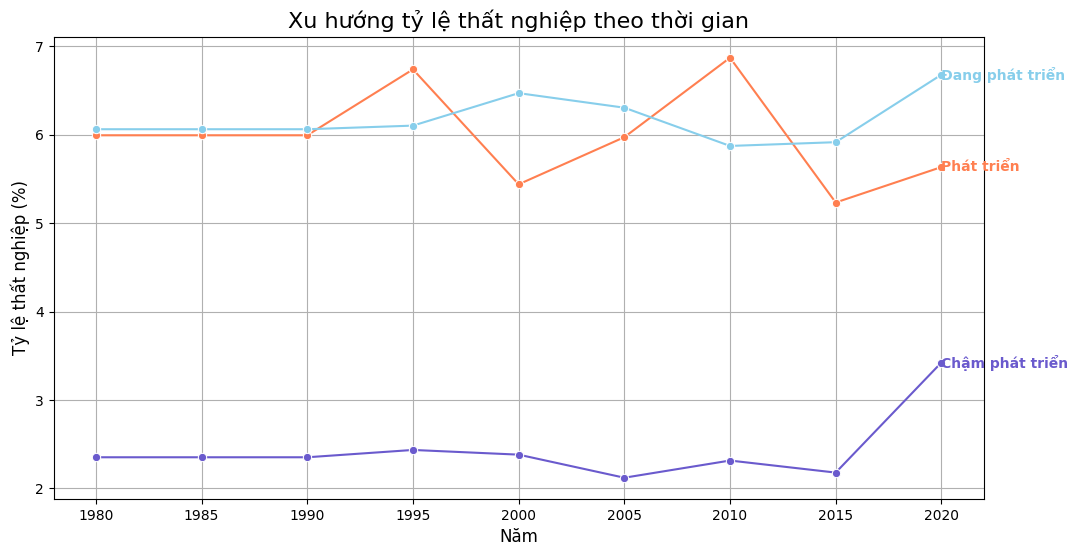

In [17]:
plt.figure(figsize=(12, 6))

# Tạo một bảng màu dễ phân biệt
palette = {
    'Phát triển': '#FF7F50',     # Màu cam
    'Đang phát triển': '#87CEEB', # Màu xanh dương nhạt
    'Chậm phát triển': '#6A5ACD'  # Màu tím
}

# Vẽ biểu đồ cho từng trạng thái phát triển
for status in group_df_filtered['Development_Status'].unique():
    data = group_df_filtered[group_df_filtered['Development_Status'] == status]
    label = 'Phát triển' if status == 0 else ('Đang phát triển' if status == 1 else 'Chậm phát triển')
    sns.lineplot(data=data, x='Year', y='Unemployment, total (% of total labor force) (modeled ILO estimate)', label=label, marker='o', color=palette[label])

# Thêm nhãn trực tiếp vào từng đường
for status in group_df_filtered['Development_Status'].unique():
    data = group_df_filtered[group_df_filtered['Development_Status'] == status]
    label = 'Phát triển' if status == 0 else ('Đang phát triển' if status == 1 else 'Chậm phát triển')
    plt.text(data['Year'].iloc[-1], data['Unemployment, total (% of total labor force) (modeled ILO estimate)'].iloc[-1], label, 
             color=palette[label], fontsize=10, weight='bold', va='center')

# Định dạng biểu đồ
plt.title('Xu hướng tỷ lệ thất nghiệp theo thời gian', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ lệ thất nghiệp (%)', fontsize=12)
plt.grid()

# Loại bỏ chú thích (nếu đã gắn nhãn trực tiếp trên đường)
plt.legend().remove()

# Hiển thị biểu đồ
plt.show()


Kỳ - Câu 3

<Figure size 1400x600 with 0 Axes>

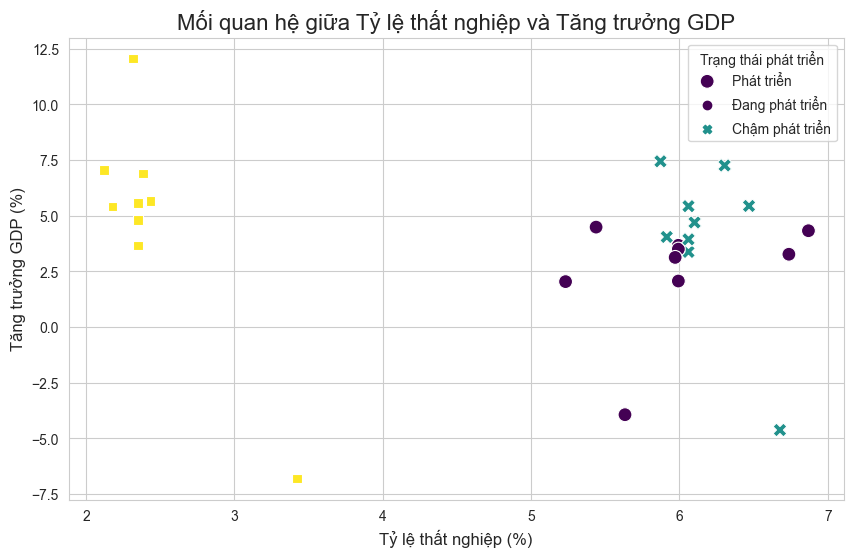

In [27]:
# Thiết lập kích thước và style chung
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# --- Biểu đồ phân tán: Mối quan hệ giữa tỷ lệ thất nghiệp và tăng trưởng GDP ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=group_df_filtered, x='Unemployment, total (% of total labor force) (modeled ILO estimate)', y='GDP growth (annual %)', hue='Development_Status', style='Development_Status', s=100, palette='viridis')
plt.title('Mối quan hệ giữa Tỷ lệ thất nghiệp và Tăng trưởng GDP', fontsize=16)
plt.xlabel('Tỷ lệ thất nghiệp (%)', fontsize=12)
plt.ylabel('Tăng trưởng GDP (%)', fontsize=12)
plt.legend(title='Trạng thái phát triển', labels=['Phát triển', 'Đang phát triển', 'Chậm phát triển'])
plt.show()





c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1200x600 with 0 Axes>

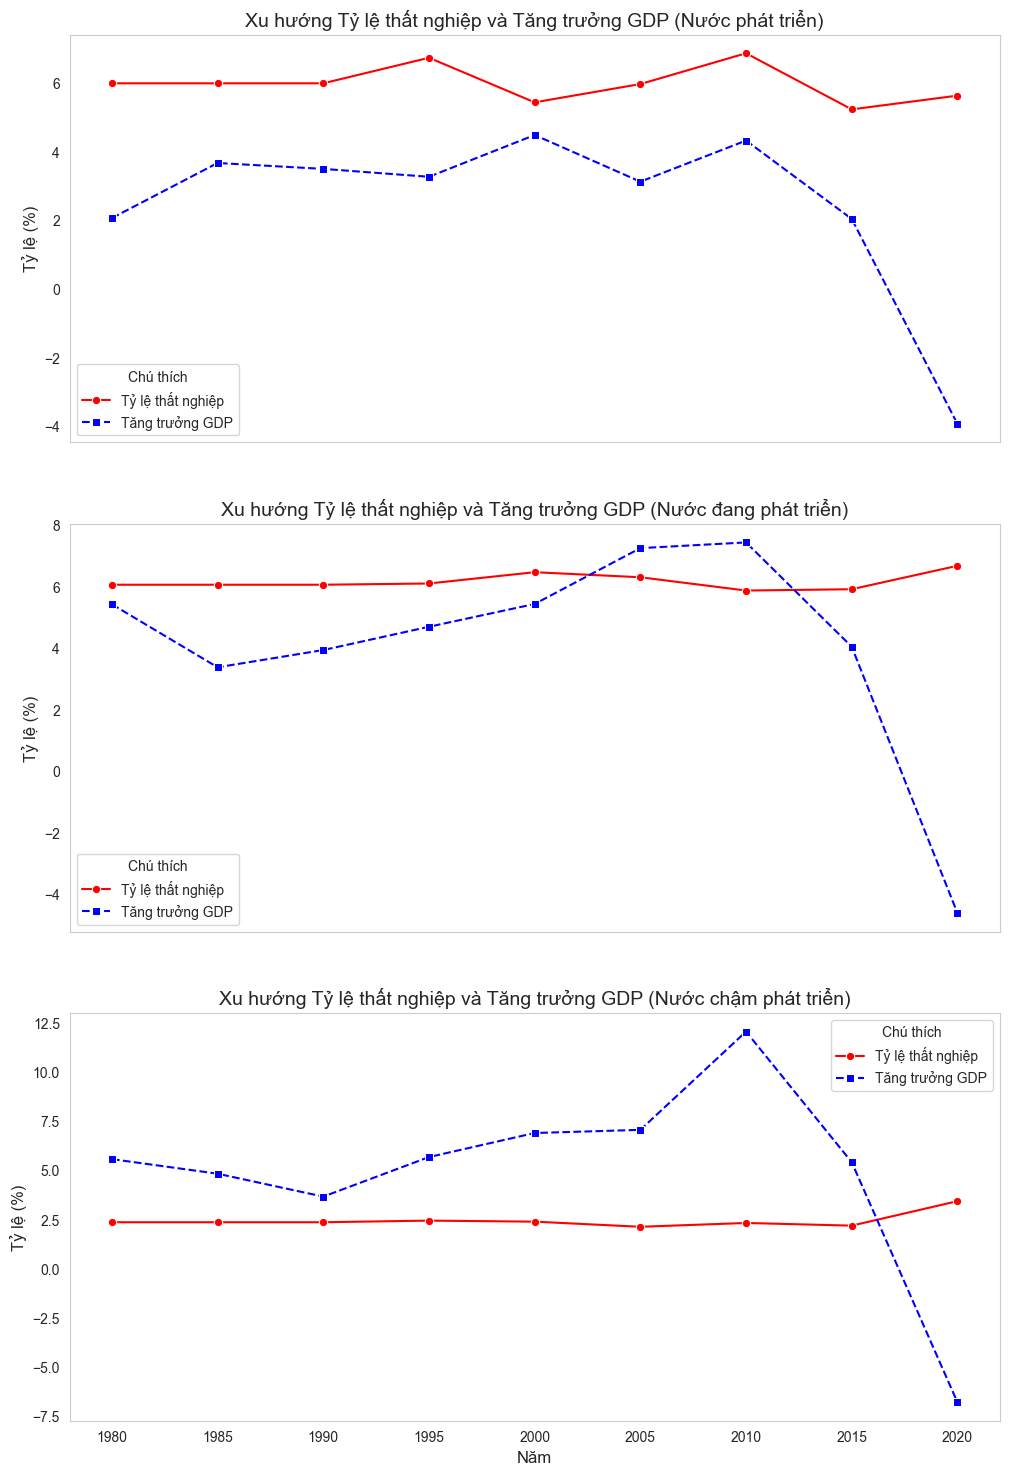

In [28]:
# --- Biểu đồ đường: Xu hướng thất nghiệp và tăng trưởng GDP theo thời gian ---
plt.figure(figsize=(12, 6))


# Tạo figure với 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Lặp qua từng nhóm phát triển để vẽ biểu đồ
for i, (status, title) in enumerate(development_groups.items()):
    subset = group_df_filtered[group_df_filtered['Development_Status'] == status]

    # Vẽ biểu đồ đường cho Tỷ lệ thất nghiệp
    sns.lineplot(data=subset, x='Year', y='Unemployment, total (% of total labor force) (modeled ILO estimate)',
                 label='Tỷ lệ thất nghiệp', marker='o', color='red', ax=axes[i])

    # Vẽ biểu đồ đường cho Tăng trưởng GDP
    sns.lineplot(data=subset, x='Year', y='GDP growth (annual %)',
                 label='Tăng trưởng GDP', marker='s', linestyle='--', color='blue', ax=axes[i])

    # Định dạng biểu đồ
    axes[i].set_title(f'Xu hướng Tỷ lệ thất nghiệp và Tăng trưởng GDP ({title})', fontsize=14)
    axes[i].set_ylabel('Tỷ lệ (%)', fontsize=12)
    axes[i].legend(title='Chú thích', fontsize=10)
    axes[i].grid()

# Cài đặt nhãn trục X cho subplot cuối cùng
axes[-1].set_xlabel('Năm', fontsize=12)

# Hiển thị biểu đồ
plt.show()

## **Khánh** 

In [3]:
data = pd.read_csv("processed_data.csv")
data

,Year,Country,"Population, total","Population, female","Population, male","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",GDP (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),GDP growth (annual %),Urban population growth (annual %),"Fertility rate, total (births per woman)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),Development_Status
0,2020,Australia,25649248,12922405,12726843,11.500,6.300,1.328414e+12,6.456000,86.241,24.026739,20.637717,-0.119591,1.369185,1.581,2.765998,19.191097,78.042912,0
1,2019,Australia,25334826,12762303,12572523,12.100,6.700,1.392724e+12,5.159000,86.124,24.159678,22.027824,2.171545,1.607625,1.657,2.558293,19.058460,78.383247,0
2,2018,Australia,24963258,12575335,12387923,12.600,6.300,1.427809e+12,5.300000,86.012,21.894091,21.841975,2.878470,1.621636,1.740,2.616852,19.887638,77.495518,0
3,2017,Australia,24592588,12390298,12202290,12.600,6.500,1.325583e+12,5.592000,85.904,21.256617,20.947114,2.279592,1.767968,1.741,2.596054,19.430111,77.973844,0
4,2016,Australia,24190907,12185876,12005031,12.900,6.600,1.206837e+12,5.711000,85.800,19.278744,21.695335,2.759386,1.677390,1.752,2.621225,19.695735,77.683040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1984,Zimbabwe,8391488,4282570,4108918,43.413,8.910,6.352126e+09,2.351978,24.736,20.561138,20.804997,-1.907360,6.288552,6.083,61.859283,12.876193,25.264525,2
1144,1983,Zimbabwe,8098404,4130412,3967992,45.119,9.442,7.764067e+09,2.351978,24.069,16.442925,19.473930,1.585305,6.494284,6.246,61.859283,12.876193,25.264525,2
1145,1982,Zimbabwe,7796496,3980628,3815868,45.918,9.776,8.539701e+09,2.351978,23.429,16.925580,22.219708,2.634297,6.200968,6.382,61.859283,12.876193,25.264525,2
1146,1981,Zimbabwe,7498635,3836536,3662099,46.494,10.122,8.011374e+09,2.351978,22.895,19.425226,25.905417,12.525425,8.608049,6.511,61.859283,12.876193,25.264525,2
